# **Project ==> CHURN PREDICTION**

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
data = pd.read_csv("saved_model/dataset/Churn_Modelling.csv")

# Displaying the first few rows of the dataset
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### **1. Handle missing values**

In [3]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
# Displaying dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


#### **2. Remove Duplicates values**

In [5]:
# Remove duplicates values
data.duplicated().sum()

0

In [6]:
data.drop_duplicates(inplace=True)
# data = data.drop_duplicates()  ==>  This also works the same way

#### **3. Remove unwanted column**

In [7]:
# Remove unwanted columns
data.drop(labels=['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


####  **4. Separating categorical and numerical columns**

In [8]:
categorical_cols = data.select_dtypes(include= 'object').columns
numerical_cols = data.select_dtypes(exclude= 'object').columns

print("categorical column: ", categorical_cols)
print("Numerical Columns: ", numerical_cols)

categorical column:  Index(['Geography', 'Gender'], dtype='object')
Numerical Columns:  Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [9]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### **5. Finding Unique values present in categorical columns**

In [10]:
data.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [11]:
data.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [12]:
data.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

#### **6. Correlation Heatmap**

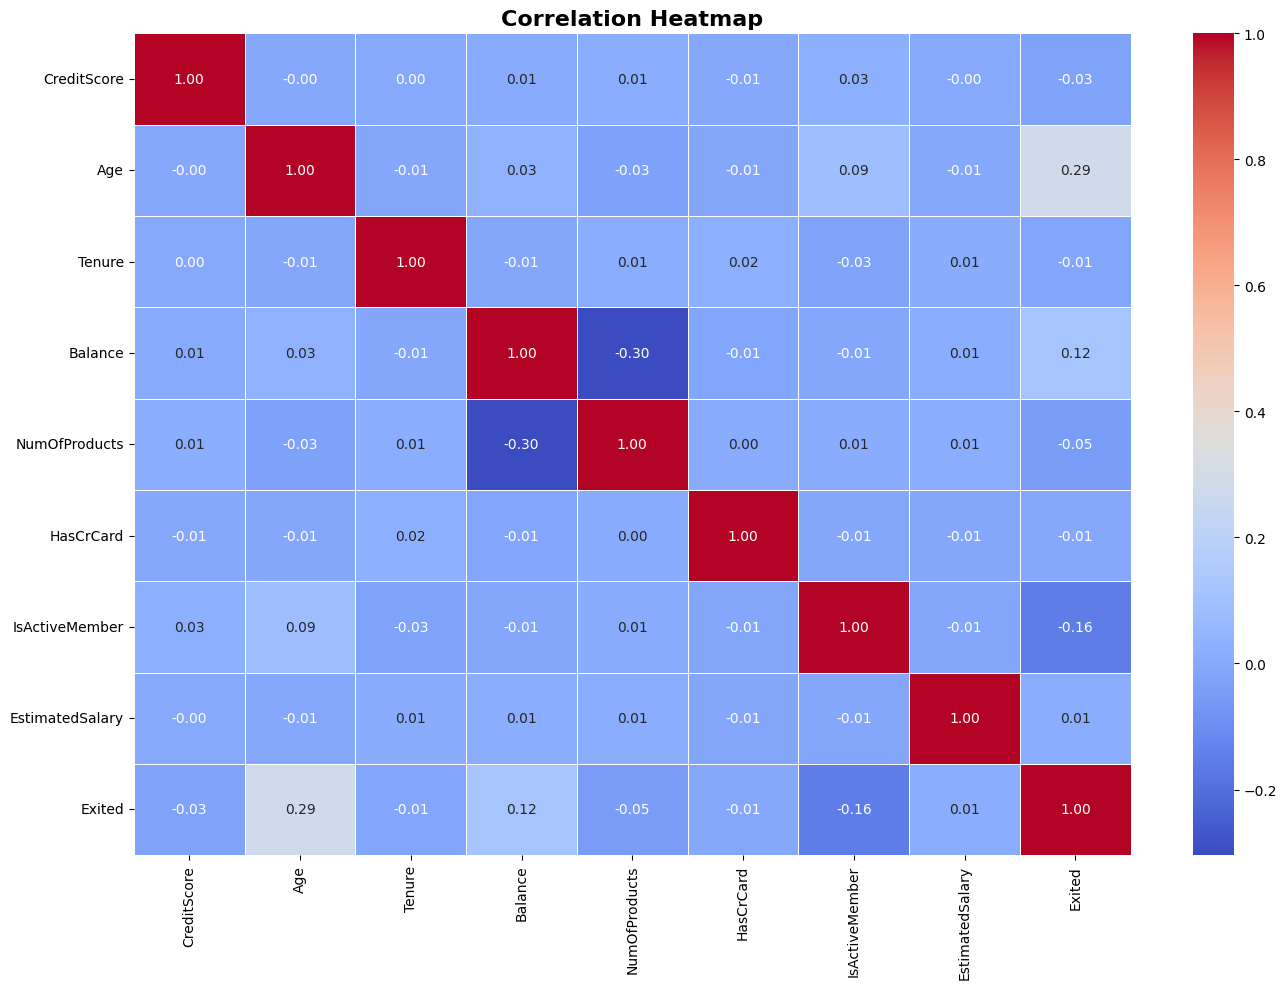

In [13]:
# Set the size of the plot so it is clearly visible
plt.figure(figsize=(14, 10))

# Calculate correlation between numerical features
# Correlation shows how strongly two variables are related
corr_matrix = data[numerical_cols].corr()

# Draw heatmap to visualize correlations
sns.heatmap(
    corr_matrix,
    annot=True,        # Show correlation values inside cells
    fmt=".2f",         # Display values upto 2 decimal places
    cmap="coolwarm",
    linewidths=0.5     # Add lines between cells for clarity
)

# Add title to explain what the plot represents
plt.title("Correlation Heatmap", fontsize=16, fontweight="bold")

# Adjust spacing so nothing overlaps
plt.tight_layout()

# Display the heatmap
plt.show()

In [14]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
# Seperating Dependent and independent features
X = data.drop('Exited', axis=1)
y = data['Exited']

In [16]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [17]:
categorical_cols = X.select_dtypes(include= 'object').columns
numerical_cols = X.select_dtypes(exclude= 'object').columns

print("categorical column: ", categorical_cols)
print("Numerical Columns: ", numerical_cols)

categorical column:  Index(['Geography', 'Gender'], dtype='object')
Numerical Columns:  Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')


#### **7. Feature Pipelines**

In [18]:
# Importing necessary libraries for preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

# Importing necessary libraries for preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [19]:
# Defining the categories for ordinal encoding
gender_cat = ['Female', 'Male']
geo_cat = ['France', 'Spain', 'Germany']

In [20]:
# Creating pipelines for numerical and categorical features
# Pipeline for numerical features
num_pipeline = Pipeline(steps=[('scaler', StandardScaler())])
               # Standardize numerical data
               # Helps the models learn faster and better

# Pipeline for categorical features
cat_pipeline = Pipeline(steps=[('ordinalencoder', OrdinalEncoder(categories=[geo_cat, gender_cat]))])
               # Convert categorical values into numbers

# Combine numerical and categorical pipelines

preprocessor = ColumnTransformer(
                    [("num_pipeline", num_pipeline, numerical_cols),      # Apply numerical pipeline to numerical columns
                     ("cat_pipeline", cat_pipeline, categorical_cols)]    # Apply categorical pipeline to categorical columns
                )

#### **Separating dataset into train andd test dataset**

In [21]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [22]:
# Applying the preprocessing pipelines to the training and testing data
X_train = pd.DataFrame(preprocessor.fit_transform(X_train), columns= preprocessor.get_feature_names_out())
X_test = pd.DataFrame(preprocessor.transform(X_test), columns= preprocessor.get_feature_names_out())

In [23]:
X_train.head()

,num_pipeline__CreditScore,num_pipeline__Age,num_pipeline__Tenure,num_pipeline__Balance,num_pipeline__NumOfProducts,num_pipeline__HasCrCard,num_pipeline__IsActiveMember,num_pipeline__EstimatedSalary,cat_pipeline__Geography,cat_pipeline__Gender
0,0.356500,-0.655786,0.345680,-1.218471,0.808436,0.649203,0.974817,1.367670,0.0,1.0
1,-0.203898,0.294938,-0.348369,0.696838,0.808436,0.649203,0.974817,1.661254,2.0,1.0
2,-0.961472,-1.416365,-0.695393,0.618629,-0.916688,0.649203,-1.025834,-0.252807,1.0,1.0
3,-0.940717,-1.131148,1.386753,0.953212,-0.916688,0.649203,-1.025834,0.915393,0.0,0.0
4,-1.397337,1.625953,1.386753,1.057449,-0.916688,-1.540351,-1.025834,-1.059600,0.0,1.0


#### **Save Model**

In [24]:
# Import pickle module to save and load Python objects
import pickle

# Open a file in write-binary mode to save the preprocessor
with open("saved_model/preprocessor.pkl", "wb") as f:
    pickle.dump(preprocessor, f)

### **ANN IMPLEMENTATION**

In [25]:
# Import TensorFlow library
import tensorflow as tf

# Import Sequential model (used to create neural networks layer by layer)
from tensorflow.keras.models import Sequential

# Import Dense layer (fully connected neural network layer)
from tensorflow.keras.layers import Dense

# Import callbacks for training optimization and monitoring
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

# Import datetime module to create unique log folders
import datetime

c:\Users\Admin\AppData\Local\conda\conda\envs\venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [26]:
# Display the dimensions of the training data
X_train.shape[1], 

(10,)

#### **Model Architecture**

In [27]:
# Create a Sequential neural network model
model = Sequential([
    
    # First hidden layer with 64 neurons and ReLU activation
    # input_shape specifies number of input features
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    
    # Second hidden layer with 32 neurons
    Dense(32, activation='relu'),
    
    # Output layer with 1 neuron and sigmoid activation
    # Sigmoid is used for binary classification
    Dense(1, activation='sigmoid')
])

c:\Users\Admin\AppData\Local\conda\conda\envs\venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
# Display model architecture summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

#### **Optimizers**

In [29]:
import tensorflow

# Define Adam optimizer with learning rate 0.001
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.001)

In [30]:
# Compile the model
model.compile(
    optimizer=opt,                    # Optimizer for weight updates
    loss="binary_crossentropy",        # Loss function for binary classification
    metrics=["accuracy"]               # Metric to evaluate model performance
)

#### **Callabacks**

In [31]:
# Create a log directory with current date and time for TensorBoard
log_dir = "logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

# Initialize TensorBoard callback to track training metrics
tensorflow_callback = TensorBoard(
    log_dir=log_dir,
    histogram_freq=1                  # Logs weight histograms
)

In [32]:
# EarlyStopping callback to stop training if validation loss does not improve
early_stopping_callback = EarlyStopping(
    monitor="val_loss",               # Metric to monitor
    patience=5,                       # Number of epochs to wait
    restore_best_weights=True         # Restore best model weights
)

#### **Model Training**

In [33]:
# Train the neural network model
history = model.fit(
    X_train, y_train,                 # Training data
    validation_data=(X_test, y_test), # Validation data
    epochs=100,                       # Maximum number of epochs
    callbacks=[tensorflow_callback, early_stopping_callback]
)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8048 - loss: 0.4592 - val_accuracy: 0.8305 - val_loss: 0.4000
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8364 - loss: 0.3896 - val_accuracy: 0.8450 - val_loss: 0.3671
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8516 - loss: 0.3603 - val_accuracy: 0.8545 - val_loss: 0.3527
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8583 - loss: 0.3465 - val_accuracy: 0.8560 - val_loss: 0.3495
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8569 - loss: 0.3426 - val_accuracy: 0.8565 - val_loss: 0.3505
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8576 - loss: 0.3403 - val_accuracy: 0.8515 - val_loss: 0.3515
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8586 - loss: 0.3356 - val_accuracy: 0.8535 - val_loss: 0.3459
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8595 - loss: 0.3340 - val_accu

In [34]:
# Save the trained model to disk
model.save("saved_model/model.h5")

#### **Load the Trained Model**

In [35]:
# Import load_model function from keras
from tensorflow.keras.models import load_model

# Load the trained model from the saved .h5 file
model = load_model("saved_model/model.h5")

#### **Training and Validation: Accuracy & Loss**

In [36]:
# Extract training and validation loss values
loss = history.history['loss']
val_loss = history.history['val_loss']

# Extract training and validation accuracy values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Total number of epochs completed
epochs = len(acc)

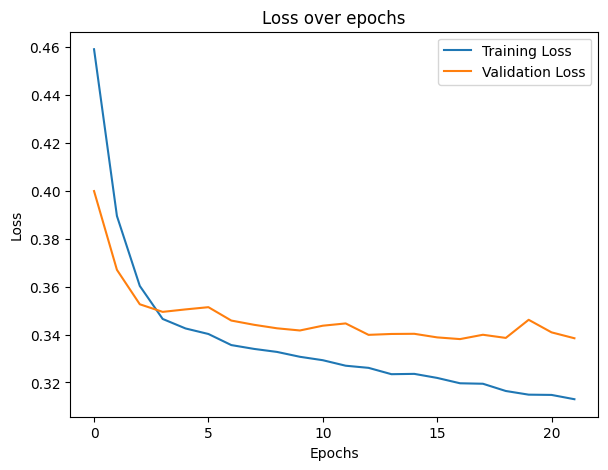

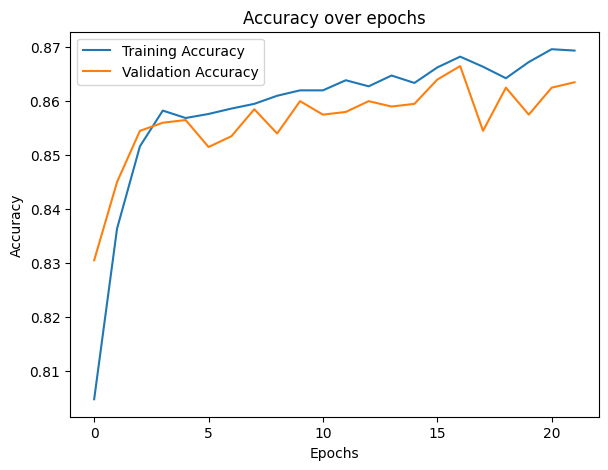

In [37]:
# Plot training and validation loss
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


# Plot training and validation accuracy
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 2)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [38]:
# Load TensorBoard extension in Jupyter Notebook
%load_ext tensorboard

In [39]:
# Launch TensorBoard to visualize training logs
%tensorboard --logdir logs/

Reusing TensorBoard on port 6006 (pid 20720), started 2:31:03 ago. (Use '!kill 20720' to kill it.)